In [37]:
import pandas as pd
import os

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [14]:
basedir = os.path.abspath('')
train = os.path.join(basedir, "Data/cleaned/data_train.csv")
test = os.path.join(basedir, "Data/cleaned/data_test.csv")
data_train = pd.read_csv(train)
data_test = pd.read_csv(test)

In [18]:
print(data_train.shape)
data_train.head(10)

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0
5,37,2,284582,3,14,1,1,2,0,1,0,0,40,0,0
6,49,2,160187,4,5,3,4,0,1,1,0,0,16,2,0
7,52,1,209642,1,9,1,1,1,0,0,0,0,45,0,1
8,31,2,45781,3,14,0,3,0,0,1,14084,0,50,0,1
9,42,2,159449,0,13,1,1,1,0,0,5178,0,40,0,1


In [39]:
data_train["income"].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [19]:
print(data_test.shape)
data_test.head(10)

(16281, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,2,7,0,9,3,1,0,0,0,40,0,0
1,38,2,89814,1,9,1,8,1,0,0,0,0,50,0,0
2,28,4,336951,6,12,1,12,1,0,0,0,0,40,0,1
3,44,2,160323,5,10,1,9,1,1,0,7688,0,40,0,1
4,18,5,103497,5,10,0,11,3,0,1,0,0,30,0,0
5,34,2,198693,12,6,0,4,0,0,0,0,0,30,0,0
6,29,5,227026,1,9,0,11,4,1,0,0,0,40,0,0
7,63,1,104626,10,15,1,3,1,0,0,3103,0,32,0,1
8,24,2,369667,5,10,0,4,4,0,1,0,0,40,0,0
9,55,2,104996,8,4,1,6,1,0,0,0,0,10,0,0


In [40]:
data_test["income"].value_counts()

0    12435
1     3846
Name: income, dtype: int64

In [26]:
data_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [31]:
X_train = data_train.drop("income", axis=1)
X_test = data_test.drop("income", axis=1)
y_train = data_train["income"]
y_test = data_test["income"]

In [45]:
clf_forest=RandomForestClassifier(random_state=42)

clf_forest.fit(X_train, y_train)

importance_forest = clf_forest.feature_importances_
y_pred = clf_forest.predict(X_test)



In [46]:
print(clf_forest.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     12435
           1       0.73      0.61      0.66      3846

    accuracy                           0.85     16281
   macro avg       0.81      0.77      0.78     16281
weighted avg       0.85      0.85      0.85     16281



Feature: 0 age, Score: 0.1531311202078683 
Feature: 1 workclass, Score: 0.0382112886849892 
Feature: 2 fnlwgt, Score: 0.1718272698426157 
Feature: 3 education, Score: 0.029396932428933733 
Feature: 4 education-num, Score: 0.0923264537308904 
Feature: 5 marital-status, Score: 0.0886061141790877 
Feature: 6 occupation, Score: 0.07146422115576405 
Feature: 7 relationship, Score: 0.06827031994088885 
Feature: 8 race, Score: 0.013834303601691548 
Feature: 9 sex, Score: 0.01890360266317812 
Feature: 10 capital-gain, Score: 0.1188329990561641 
Feature: 11 capital-loss, Score: 0.03615216511890515 
Feature: 12 hours-per-week, Score: 0.081711632480224 
Feature: 13 native-country, Score: 0.01733157690879886 


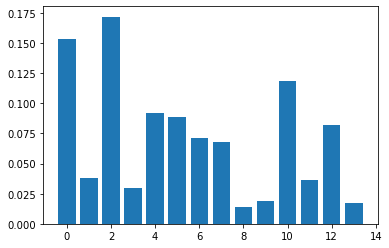

In [38]:
for i,v in enumerate(importance_forest):
    print('Feature: {} {}, Score: {} '.format(i,data_train.columns[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance_forest))], importance_forest)
plt.show()